In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

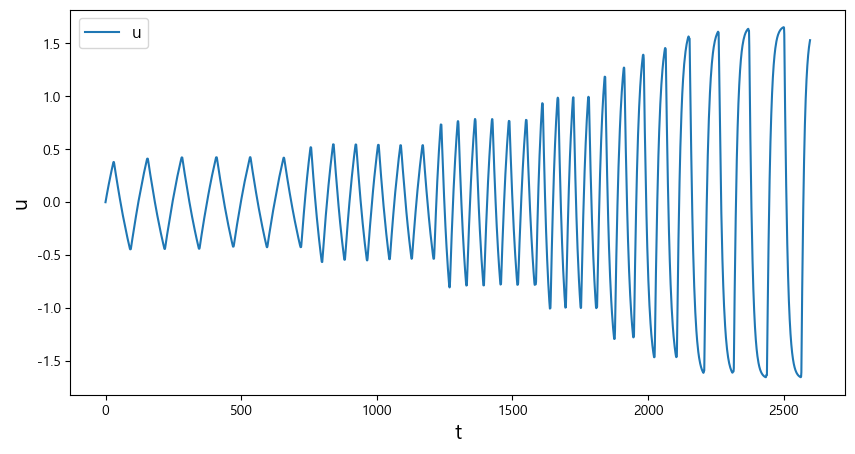

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(df_2['V2'], label = 'u')
plt.ylabel('u', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

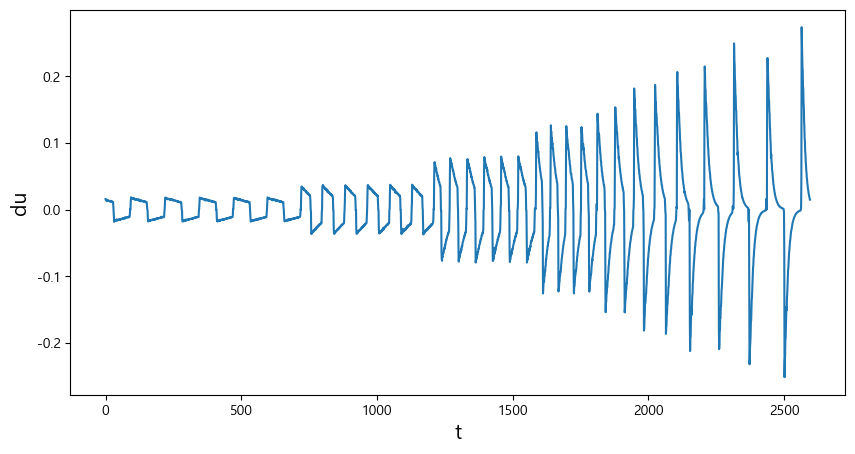

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(dx)
plt.ylabel('du', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.show()

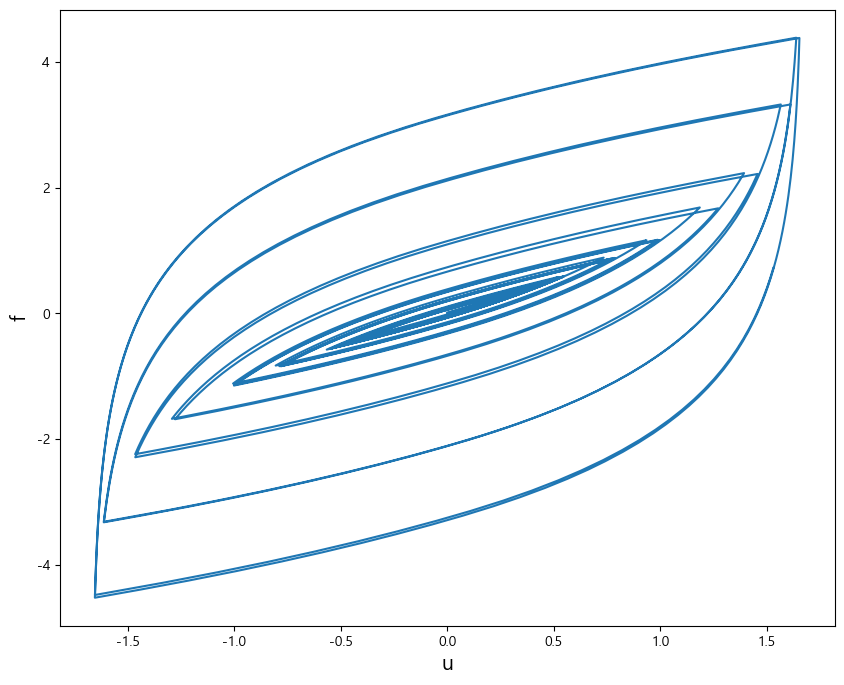

In [7]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V1'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

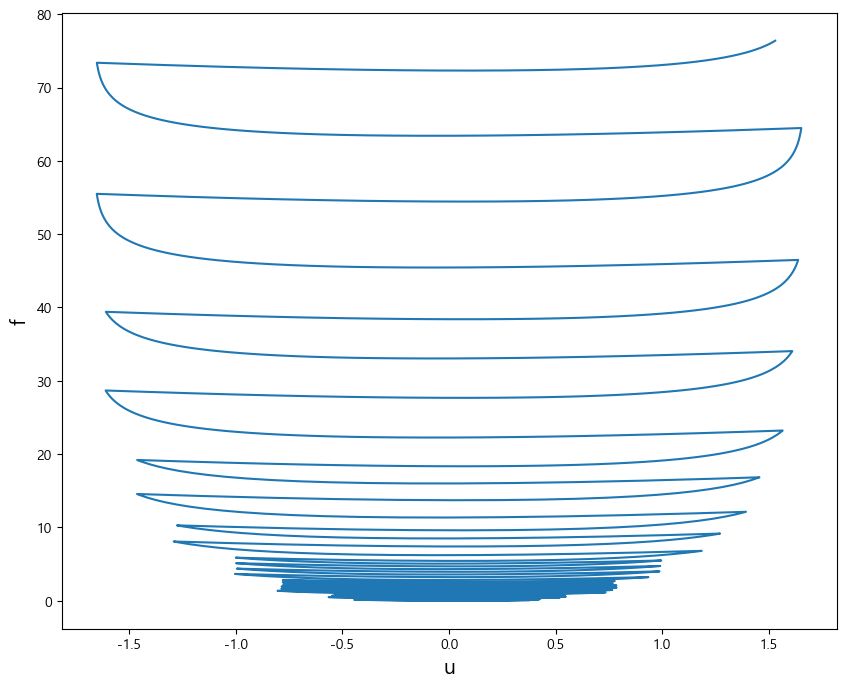

In [8]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V3'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

In [9]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [10]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [11]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # u
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


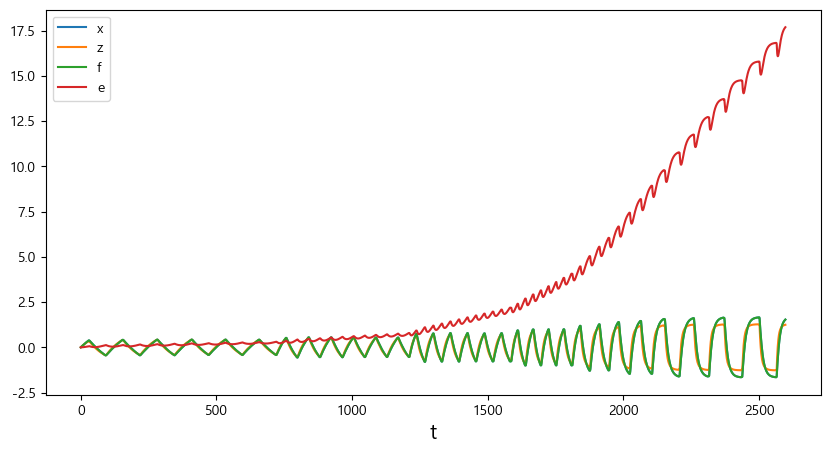

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,0], label = 'x')
plt.plot(result_matrix[:,1], label = 'z')
plt.plot(result_matrix[:,2], label = 'f')
plt.plot(result_matrix[:,3], label = 'e')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

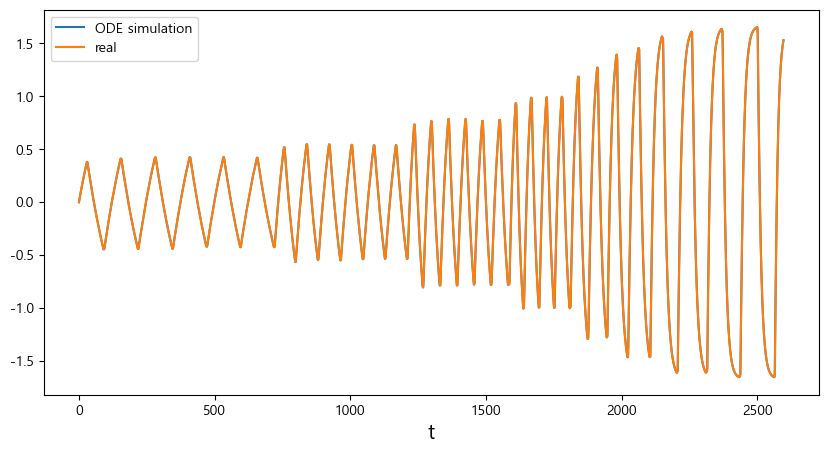

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,2], label = 'ODE simulation')
df_2.iloc[:,2].plot(label = 'real')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

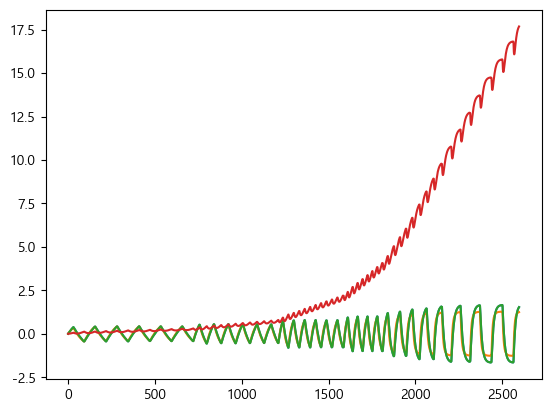

In [14]:
plt.plot(result_matrix[:,])

-----

In [15]:
df = make_data(dt = 1, total_time = 10000)

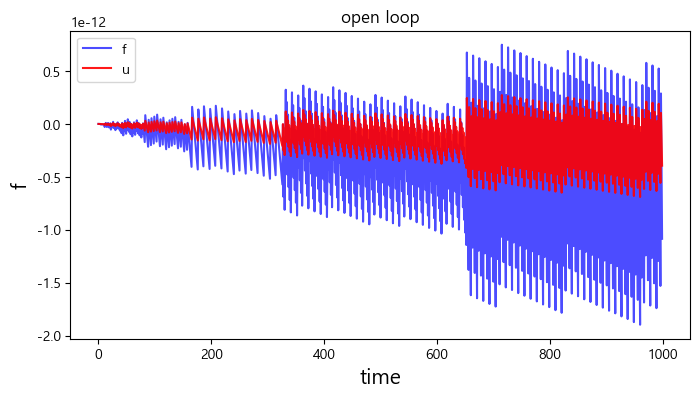

In [16]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.f[:1000], label = 'f', color = 'blue', alpha = 0.7)
plt.plot(df.u[:1000], label = 'u', color = 'red', alpha = 0.9)

plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.legend()
plt.show()

In [17]:
df.f

0        0.000000e+00
1       -5.551115e-17
2       -1.665335e-16
3       -3.330669e-16
4       -4.496403e-15
             ...     
9996    -9.936274e-12
9997     1.885270e-12
9998    -6.306122e-12
9999    -1.449346e-11
10000   -2.671918e-12
Name: f, Length: 10001, dtype: float64

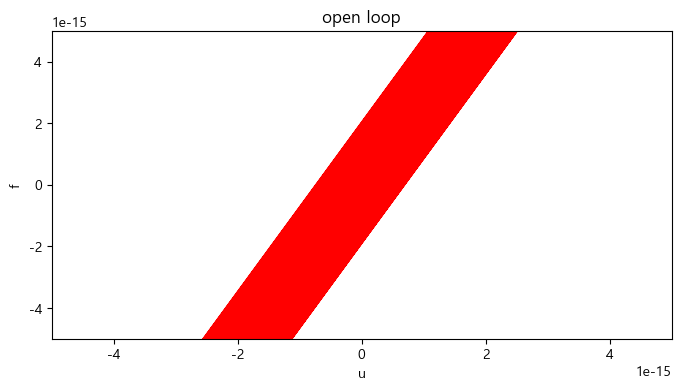

In [18]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u, df.f, color = 'red')
plt.ylim(-0.5*1e-14, 0.5*1e-14)
plt.xlim(-0.5*1e-14, 0.5*1e-14)
plt.ylabel('f')
plt.xlabel('u')
plt.show()

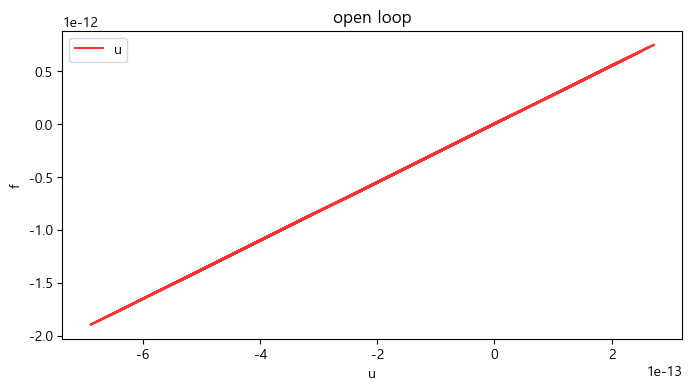

In [19]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u[:1000], df.f[:1000], alpha = 0.8, label = 'u', color = 'red')
plt.ylabel('f')
plt.xlabel('u')
plt.legend()
plt.show()

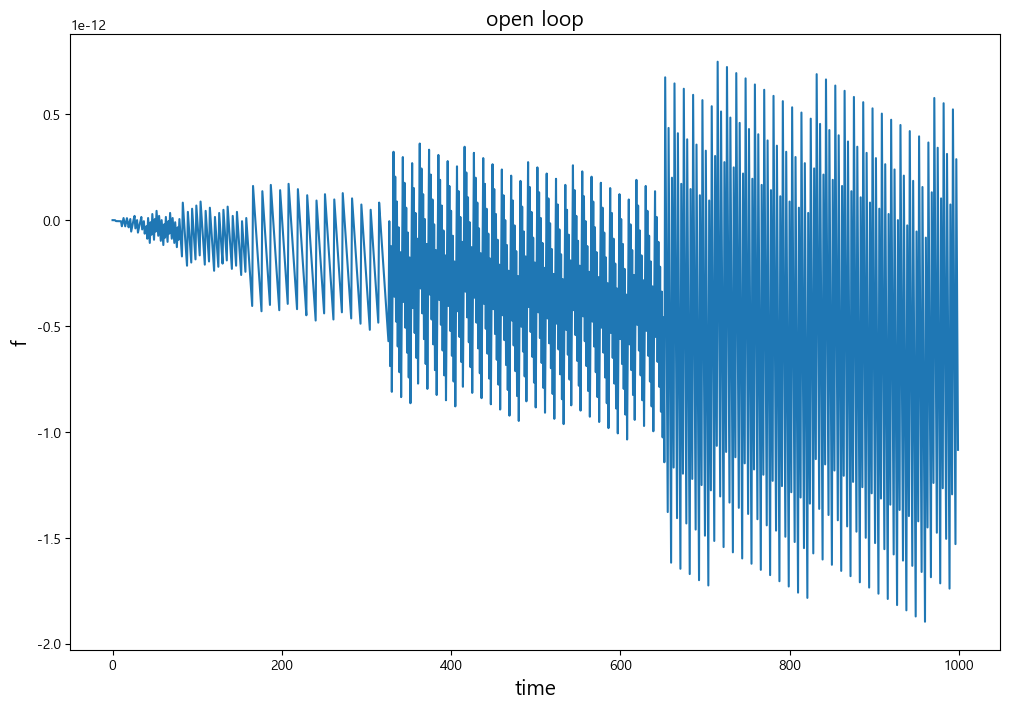

In [20]:
plt.figure(figsize=(12,8))
plt.title('open loop', fontsize = 15)
plt.plot(df.f[:1000])
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

In [21]:
train_df = df[:6000]
test_df = df[6000:]

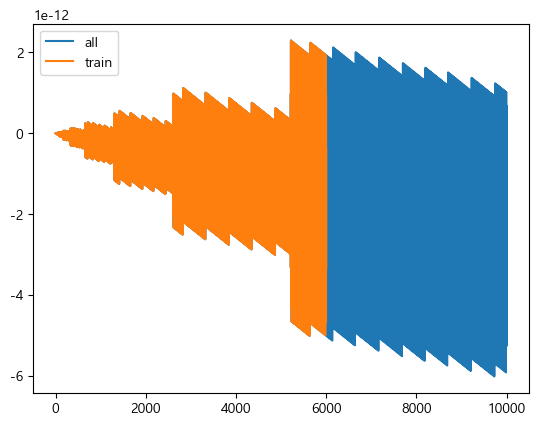

In [22]:
plt.plot(df.u)
plt.plot(train_df.u)
plt.legend(['all', 'train'])

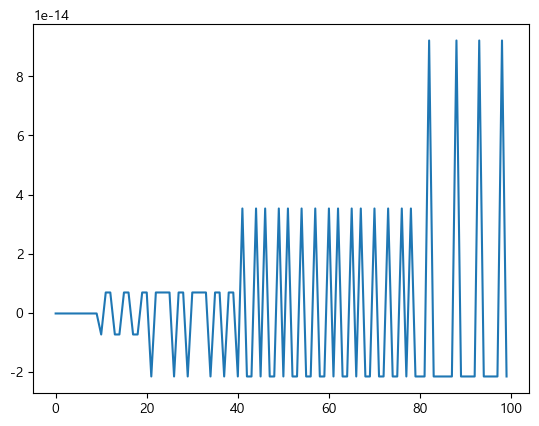

In [23]:
plt.plot(np.diff(df.u, axis=0)[:100])

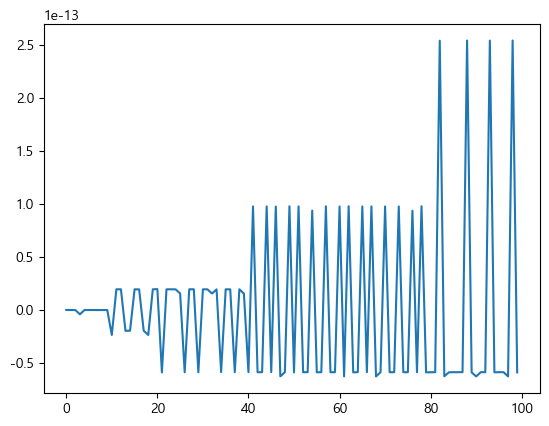

In [24]:
plt.plot(np.diff(df.f, axis=0)[:100])

In [25]:
d_x = np.diff(df.u, axis=0)

In [26]:
train_dx = d_x[:6000]
test_dx = d_x[6000:]

In [27]:
from pyswarm import pso

In [28]:
def objective_function(params, dx, target_df):
    gamma, beta, alpha, n, z = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [29]:
lb = [-10, -10, -10, -10, -10] 
ub = [10, 10, 10, 10, 10]

args = (train_dx, np.append(np.diff(train_df['f'], axis=0),0))

In [30]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=100, args = args, debug = True, minstep=1e-8)

No constraints given.


Best after iteration 1: [ 0.58971187  0.11801777 -3.87487463 -0.10232214 -4.59057745] 1.6476352971381737e-05
Best after iteration 2: [ 0.58971187  0.11801777 -3.87487463 -0.10232214 -4.59057745] 1.6476352971381737e-05
Best after iteration 3: [ 0.58971187  0.11801777 -3.87487463 -0.10232214 -4.59057745] 1.6476352971381737e-05
Best after iteration 4: [ 0.58971187  0.11801777 -3.87487463 -0.10232214 -4.59057745] 1.6476352971381737e-05
New best for swarm at iteration 5: [ 2.36102827 -0.32907191 -3.89998355 -1.20465914 -4.858662  ] 1.592702238409526e-05
Best after iteration 5: [ 2.36102827 -0.32907191 -3.89998355 -1.20465914 -4.858662  ] 1.592702238409526e-05
Best after iteration 6: [ 2.36102827 -0.32907191 -3.89998355 -1.20465914 -4.858662  ] 1.592702238409526e-05
New best for swarm at iteration 7: [ 1.62727239 -0.0830635  -6.67209058 -1.02242417 -5.65734518] 4.082894504833218e-06
Best after iteration 7: [ 1.62727239 -0.0830635  -6.67209058 -1.02242417 -5.65734518] 4.082894504833218e-06
Ne

In [31]:
optimized_params

array([ 1.52624860e+00, -5.79690478e-04, -4.12954462e+00, -8.47006546e-01,
       -4.54075473e+00])

In [78]:
gamma, beta, alpha, n, z = optimized_params

In [79]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [80]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(z, d_x[i], gamma, beta, alpha, n)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + d_x[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


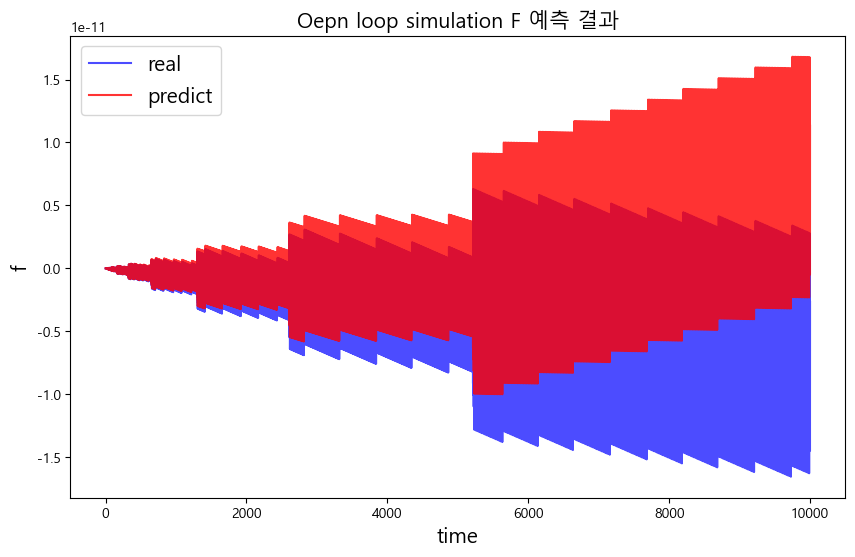

In [151]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)), df.f, color = 'blue', alpha = 0.7, label = 'real')
plt.plot(range(len(df)),result_matrix_2[:,2], color = 'red', alpha = 0.8, label = 'predict')
plt.title('Oepn loop simulation F 예측 결과', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

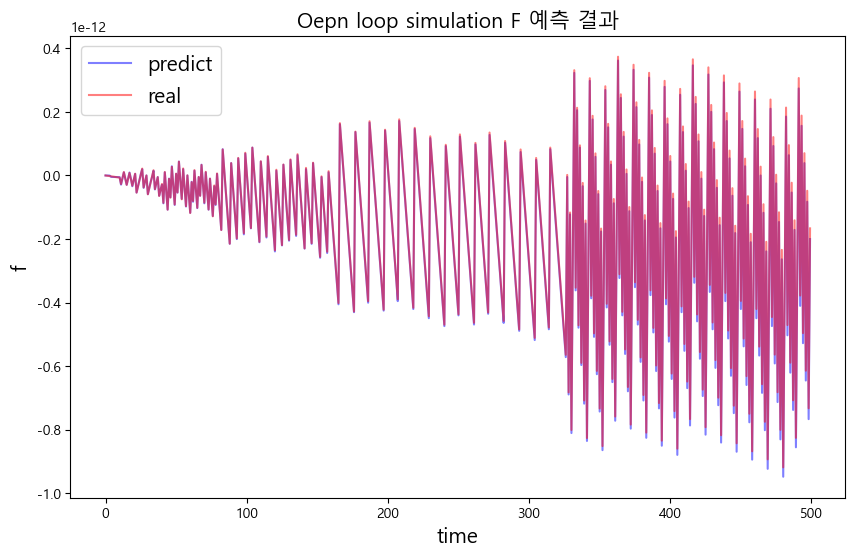

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(500), df.f[:500], color = 'blue', alpha = 0.5)
plt.plot(range(500),result_matrix_2[:500,2], color = 'red', alpha = 0.5)
plt.title('Oepn loop simulation F 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

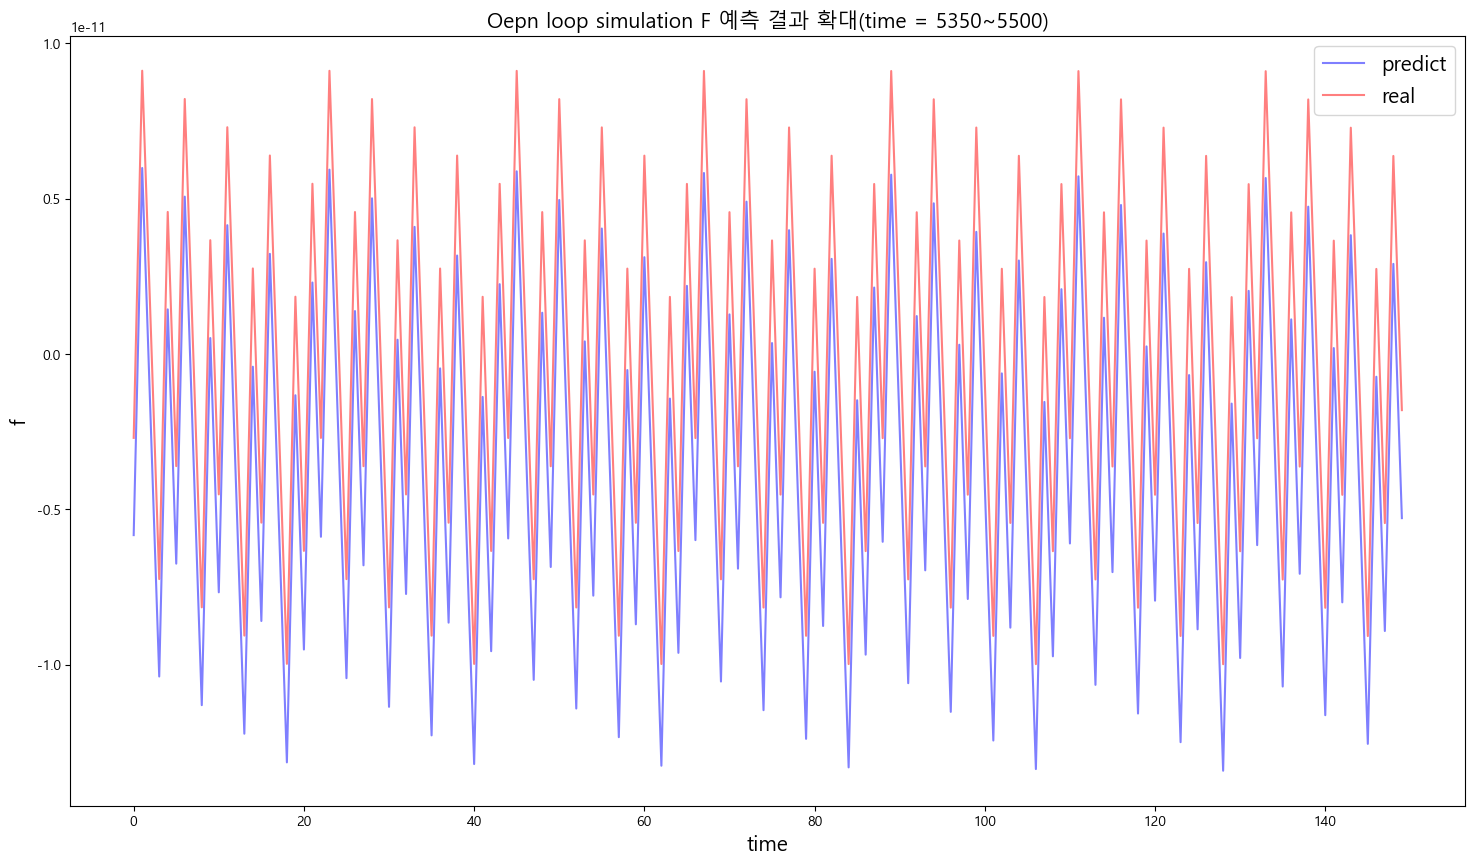

In [166]:
plt.figure(figsize=(18,10))
plt.plot(range(150), df.f[5350:5500], color = 'blue', alpha = 0.5)
plt.plot(range(150),result_matrix_2[5350:5500,2], color = 'red', alpha = 0.5)
plt.title('Oepn loop simulation F 예측 결과 확대(time = 5350~5500)', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

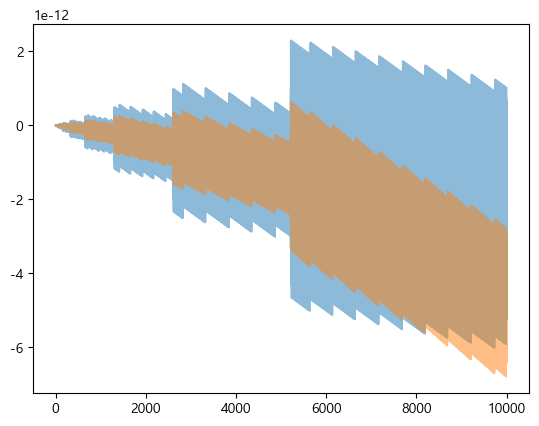

In [85]:
plt.plot(result_matrix_2[:,0], label = 'z', alpha = 0.5)
plt.plot(result_matrix_2[:,1], label = 'u', alpha = 0.5)

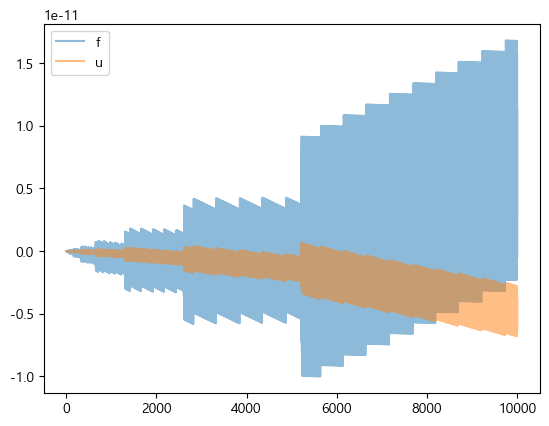

In [87]:
plt.plot(result_matrix_2[:,2], label = 'f', alpha = 0.5)
plt.plot(result_matrix_2[:,1], label = 'u', alpha = 0.5)
plt.legend()
plt.show()


In [43]:
import tensorflow as tf
from tensorflow.keras import layers

In [44]:
pred_u_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [45]:
pred_u_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
mn = MinMaxScaler()

In [48]:
traind_mn = mn.fit_transform(train_df.u.values.reshape(-1,1))
testd_mn = mn.transform(test_df.u.values.reshape(-1,1))

train_f_mn = mn.fit_transform(train_df.f.values.reshape(-1,1))
test_f_mn = mn.transform(test_df.f.values.reshape(-1,1))

In [49]:
pred_u_model.fit(traind_mn, train_f_mn, epochs=100, verbose=1)

Epoch 1/100


188/188 [==============================] - 1s 647us/step - loss: 0.0365 - mae: 0.1089 - mse: 0.0365
Epoch 2/100
188/188 [==============================] - 0s 687us/step - loss: 1.1038e-04 - mae: 0.0051 - mse: 1.1038e-04
Epoch 3/100
188/188 [==============================] - 0s 625us/step - loss: 6.7918e-06 - mae: 8.6329e-04 - mse: 6.7918e-06
Epoch 4/100
188/188 [==============================] - 0s 624us/step - loss: 2.6081e-06 - mae: 6.9145e-04 - mse: 2.6081e-06
Epoch 5/100
188/188 [==============================] - 0s 618us/step - loss: 1.6606e-06 - mae: 5.6104e-04 - mse: 1.6606e-06
Epoch 6/100
188/188 [==============================] - 0s 615us/step - loss: 1.2900e-06 - mae: 5.2155e-04 - mse: 1.2900e-06
Epoch 7/100
188/188 [==============================] - 0s 604us/step - loss: 1.0491e-06 - mae: 4.5417e-04 - mse: 1.0491e-06
Epoch 8/100
188/188 [==============================] - 0s 620us/step - loss: 8.6101e-07 - mae: 4.1141e-04 - mse: 8.6101e-07
Epoch 9/100
188/188 [===============

In [50]:
pred_f = pred_u_model.predict(testd_mn)

126/126 [==============================] - 0s 487us/step


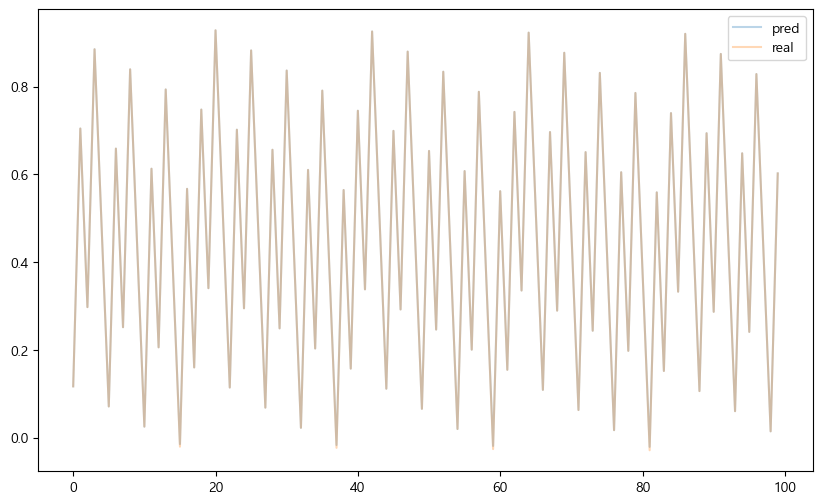

In [51]:
plt.figure(figsize = (10,6))
plt.plot(pred_f[900:1000], alpha = 0.3, label = 'pred')
plt.plot(test_f_mn[900:1000], alpha = 0.3, label = 'real')
plt.legend()
plt.show()

---------
-----------


In [88]:
close_df = make_data(dt = 0.01, total_time = 100)

In [89]:
close_df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
9996,-2.486899e-01,99.96,0.299485
9997,-1.873813e-01,99.97,0.338637
9998,-1.253332e-01,99.98,0.375329
9999,-6.279052e-02,99.99,0.410222


In [90]:
close_df_train = close_df[:6000]
close_df_test = close_df[6000:]

In [91]:
close_dx = np.diff(close_df.u, axis=0)

In [92]:
train_close_dx = close_dx[:6000]
test_close_dx = close_dx[6000:]

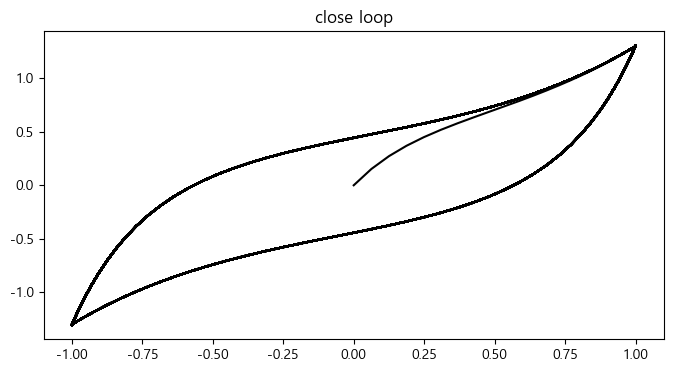

In [93]:
plt.figure(figsize=(8,4))
plt.title('close loop')
plt.plot(close_df.u, close_df.f, color = 'k')
plt.show()

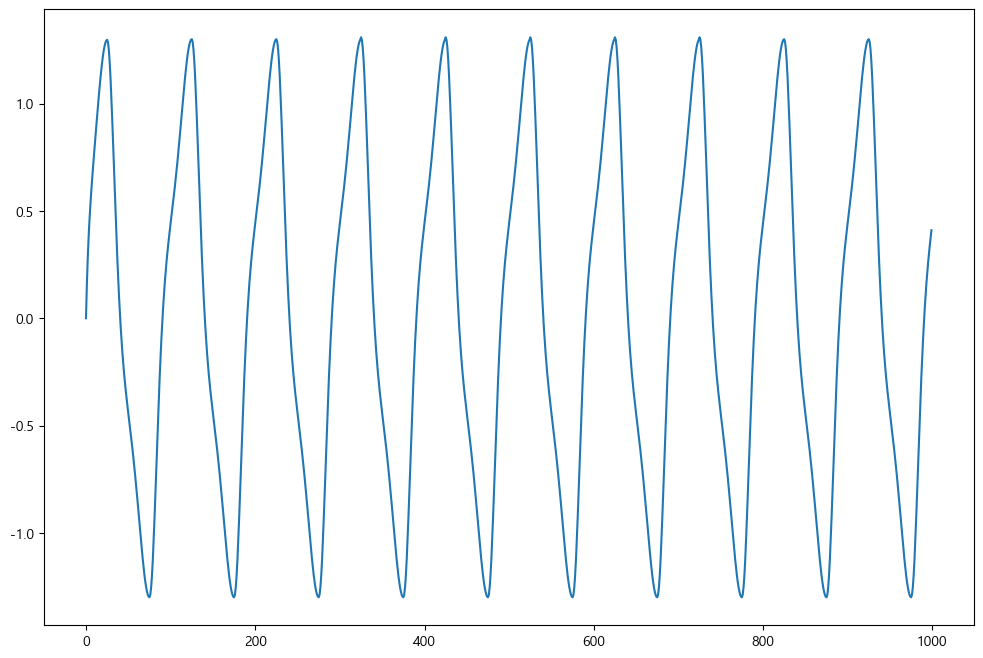

In [94]:
plt.figure(figsize=(12,8))
plt.plot(close_df.f[:1000])

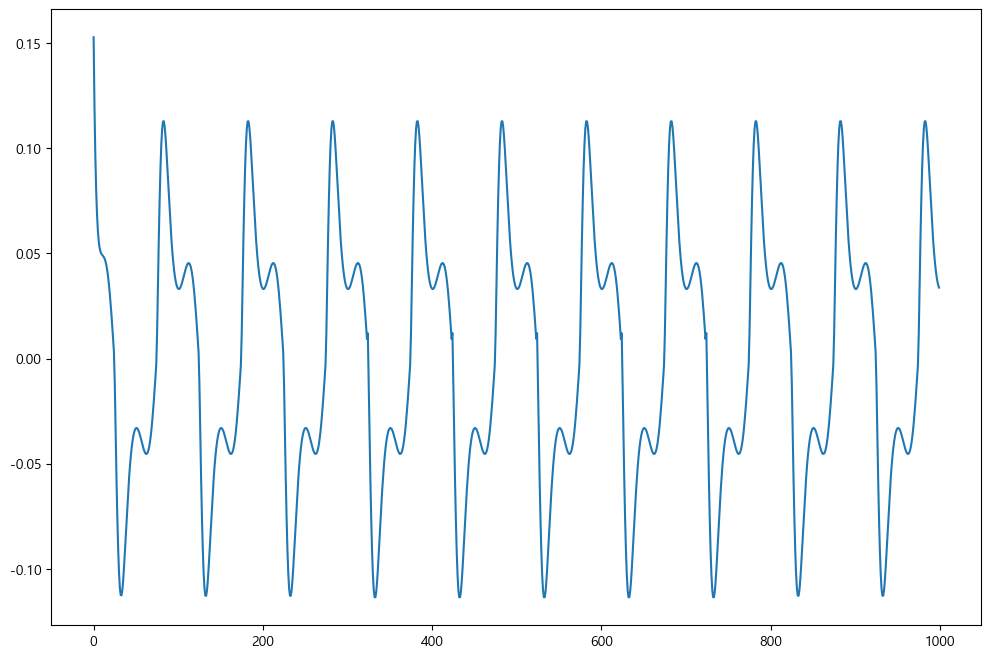

In [95]:
plt.figure(figsize=(12,8))
plt.plot(np.diff(close_df['f'], axis=0)[:1000])

In [60]:
target_df = np.append(np.diff(close_df_train['f'], axis=0),0)

In [62]:
args_2 = (train_close_dx, target_df)

In [63]:
def objective_function_2(params, dx, target_df):
    gamma, beta, alpha, z, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [64]:
lb_2 = [-10, -10, -10, -10, -10]
ub_2 = [10, 10, 10, 10, 10]

In [65]:
optimized_params_2, _ = pso(objective_function_2, lb_2, ub_2, maxiter=300, args = args_2, debug=True, swarmsize=10, phip = 0.7, phig = 0.7, minstep=1e-10)

No constraints given.
New best for swarm at iteration 1: [ 7.83697946  0.40851257  2.4916822   8.03990761 -2.49303526] 954922.7868846491
Best after iteration 1: [ 7.83697946  0.40851257  2.4916822   8.03990761 -2.49303526] 954922.7868846491
Best after iteration 2: [ 7.83697946  0.40851257  2.4916822   8.03990761 -2.49303526] 954922.7868846491
Best after iteration 3: [ 7.83697946  0.40851257  2.4916822   8.03990761 -2.49303526] 954922.7868846491
Best after iteration 4: [ 7.83697946  0.40851257  2.4916822   8.03990761 -2.49303526] 954922.7868846491
Best after iteration 5: [ 7.83697946  0.40851257  2.4916822   8.03990761 -2.49303526] 954922.7868846491
New best for swarm at iteration 6: [ 9.94374286 -0.23959348  3.61546114  6.57636824 -3.07815976] 954705.9743900134
Best after iteration 6: [ 9.94374286 -0.23959348  3.61546114  6.57636824 -3.07815976] 954705.9743900134
Best after iteration 7: [ 9.94374286 -0.23959348  3.61546114  6.57636824 -3.07815976] 954705.9743900134
New best for swarm a

In [66]:
optimized_params_2

array([ 9.28788097, -0.08052028,  4.02697892,  6.33607973, -3.12162898])

In [67]:
gamma_close, beta_close, alpha_close, close_z, close_n = optimized_params_2

In [68]:
result_matrix_3 = np.zeros((len(close_df), 4)) # z, x, f, e

In [69]:
for i in range(len(result_matrix_3)-1):
    res = eval_inc(close_z, close_dx[i], gamma_close, beta_close, alpha_close, close_n)

    result_matrix_3[i+1,0] = result_matrix_3[i,0] + close_dx[i] # x
    result_matrix_3[i+1,1] = result_matrix_3[i,1] + res[0] # z
    result_matrix_3[i+1,2] = result_matrix_3[i,2] + res[1] # f
    result_matrix_3[i+1,3] = result_matrix_3[i,3] + res[2] # e

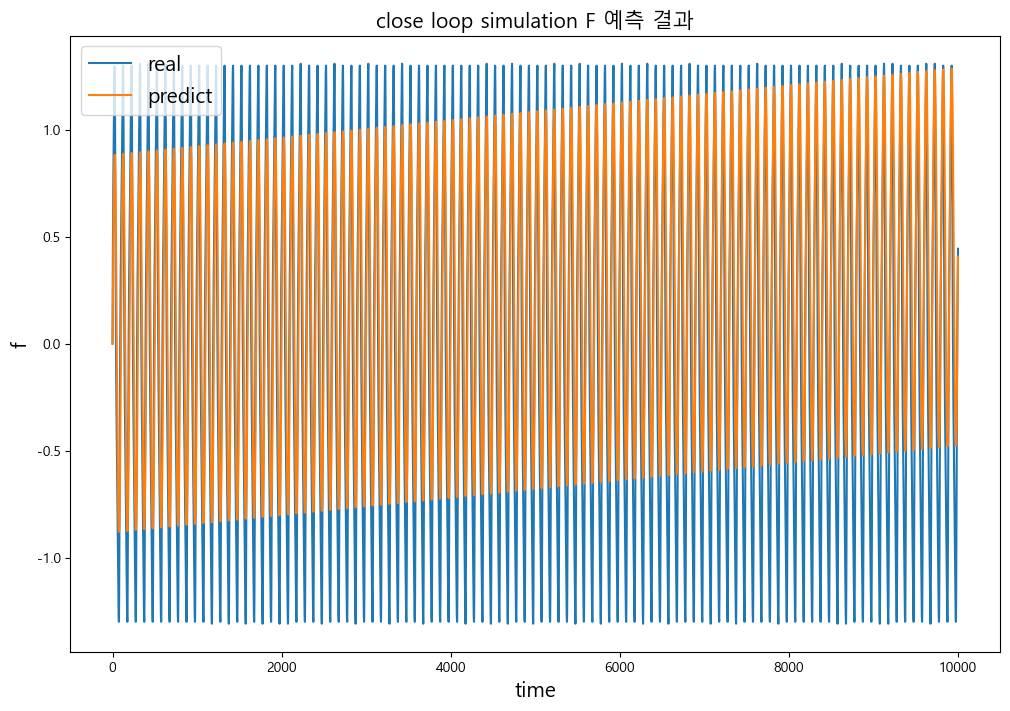

In [70]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df)), close_df.f, label = 'real')
plt.plot(range(len(df)),result_matrix_3[:,2], label = 'predict')
plt.title('close loop simulation F 예측 결과', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

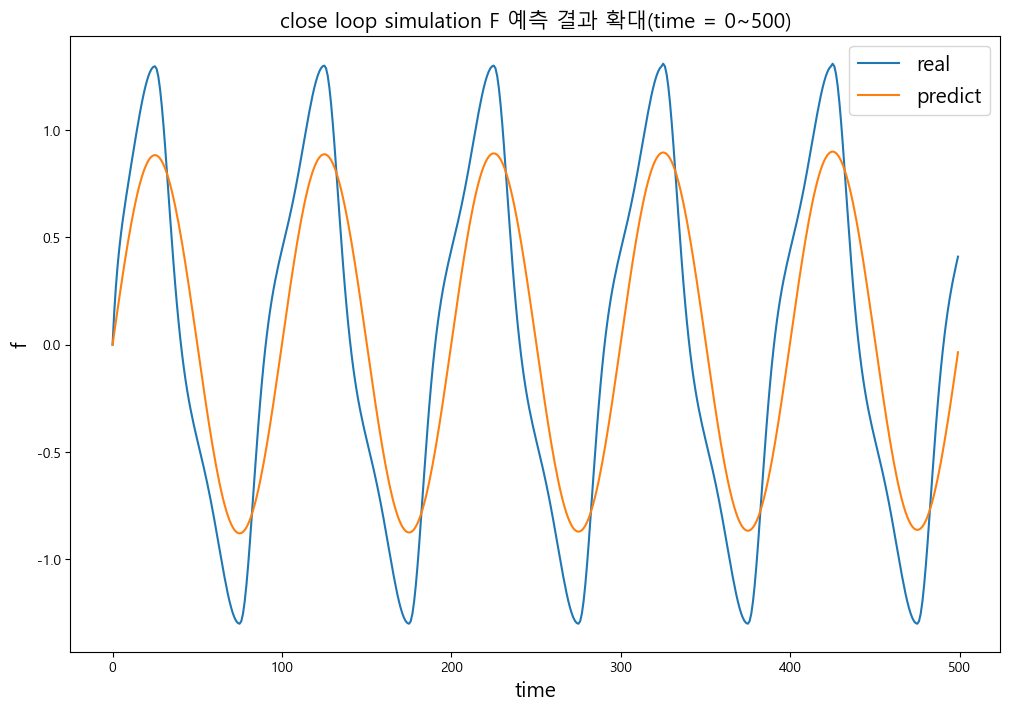

In [167]:
plt.figure(figsize=(12,8))
plt.plot(range(500), close_df.f[:500], label = 'real')
plt.plot(range(500),result_matrix_3[:,2][:500], label = 'predict')
plt.title('close loop simulation F 예측 결과 확대(time = 0~500)', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

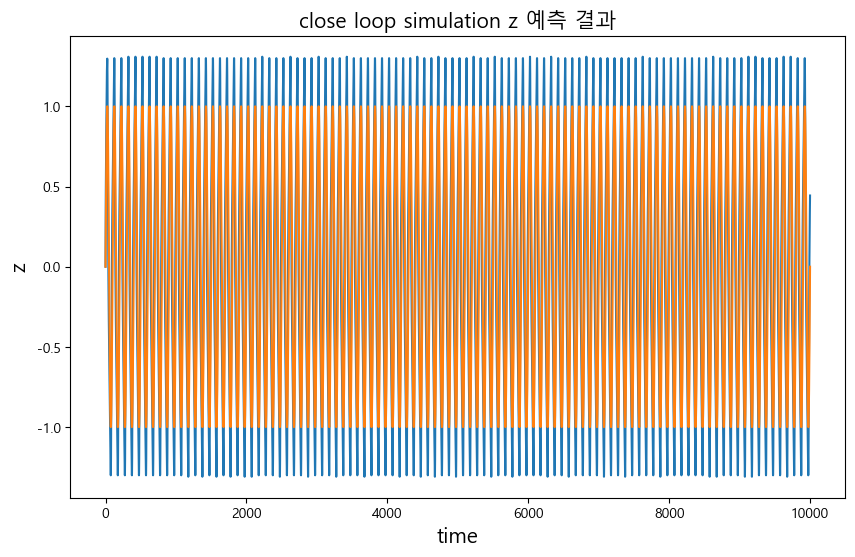

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)), close_df.f)

plt.plot(range(len(df)),result_matrix_3[:,0])

plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.ylabel('z', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

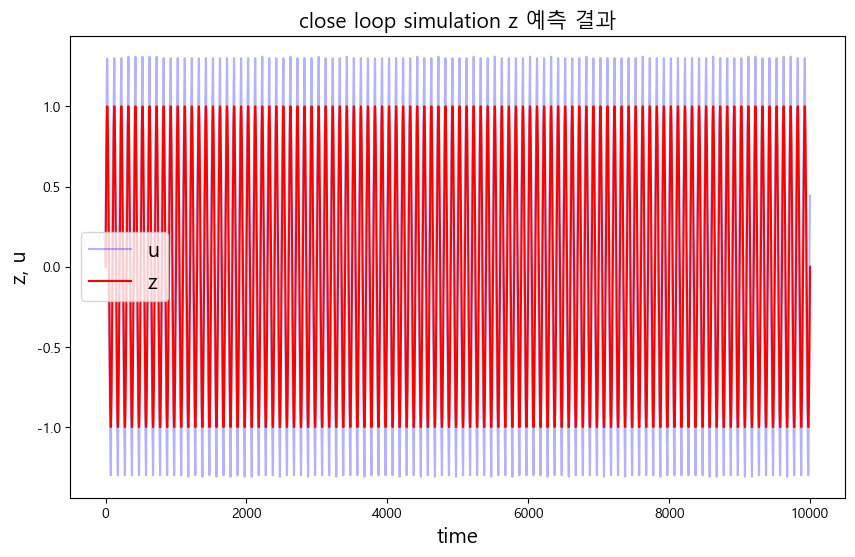

In [170]:
plt.figure(figsize=(10,6))
plt.plot(range(len(close_df)), close_df.f, label = 'u', color = 'b', alpha = 0.3)

plt.plot(range(len(close_df)),result_matrix_3[:,0], label = 'z', color = 'r')

plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('z, u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

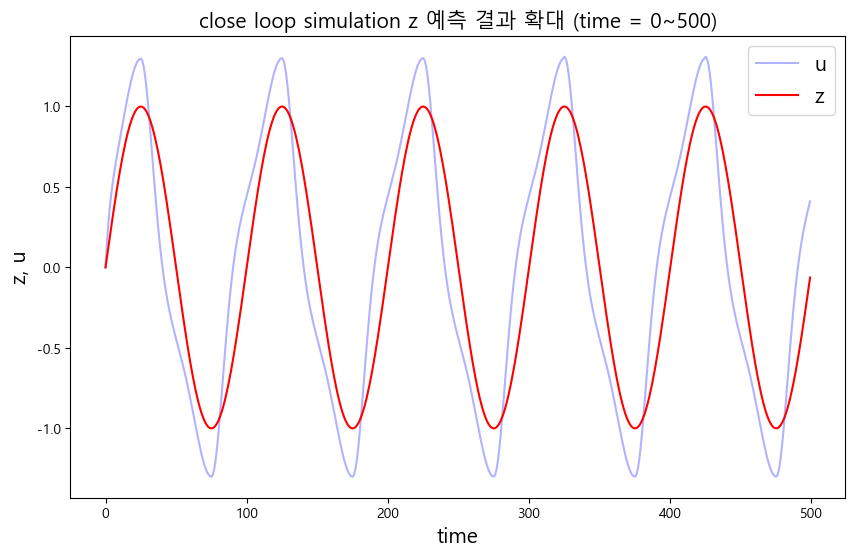

In [171]:
plt.figure(figsize=(10,6))
plt.plot(range(500), close_df.f[:500], label = 'u', color = 'b', alpha = 0.3)

plt.plot(range(500),result_matrix_3[:500,0], label = 'z', color = 'r')

plt.title('close loop simulation z 예측 결과 확대 (time = 0~500)', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('z, u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()